#                             How to survive in the tatanic


In [1]:
##### import some module and load csv dataset
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot
from statsmodels.stats.anova import anova_lm
all_in_tatanic= pd.read_csv('titanic_data.csv')

Populating the interactive namespace from numpy and matplotlib


##  1. explore data find out what I can do with these data

### 1.1 first exploration of the data set
* find out wether there are some missing data 
* take a look at how many survivers


In [2]:
all_in_tatanic.head()    ### let us take a look at our dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
all_in_tatanic['Survived'].describe()     ## heck out numbers of all passengers ,and what's the percentage of survived people.

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

### there are 891 people in record,and about 38% of they survived

In [3]:
all_in_tatanic.info() ### 1.2  figure out how many missing record in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### there some missing record in Age and Embarked item. Carbin record was lost more than half
### 1.2  single-variable analysis 
* we want to kwnow about how surcived people and dead people distribute in different Pclass,Sex,Age,SibSp,Parch,Embarked.

In [4]:
y = 'Survived'
x1 = 'Pclass'
x2 = 'Sex'
x3='Age'
x4 = 'SibSp'
x5 = 'Parch'
x6='Embarked'

In [5]:
def get_mean(x):
    print(all_in_titanic.groupby(x).mean().sort_values(by='Survived',ascending=False))
    all_in_titanic.groupby(x)['Survived'].mean().plot(kind = 'bar')
    plt.ylabel('Survival Proportions')
    plt.title('Survival Probability by ' + str(x))

In [6]:
get_mean(x1) ### 1.3.1 mean survived rate in different pclass

NameError: global name 'all_in_titanic' is not defined

        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893  


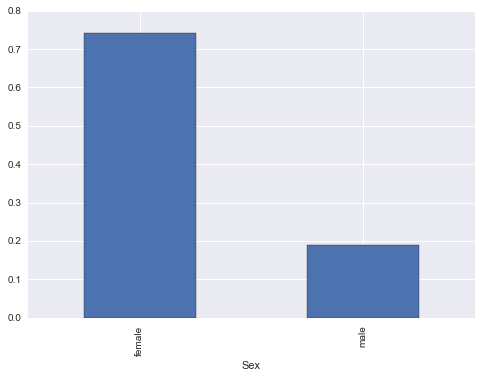

In [7]:
get_mean(x2) ### 1.3.2  mean survived rate in different gender

In [8]:
get_mean(x3) ### 1.3.3 mean survived rate in different Age

       PassengerId  Survived    Pclass     SibSp     Parch        Fare
Age                                                                   
0.42    804.000000  1.000000  3.000000  0.000000  1.000000    8.516700
5.00    380.000000  1.000000  2.750000  1.750000  1.250000   22.717700
63.00   380.000000  1.000000  2.000000  0.500000  0.000000   43.772900
53.00   572.000000  1.000000  1.000000  2.000000  0.000000   51.479200
0.67    756.000000  1.000000  2.000000  1.000000  1.000000   14.500000
13.00   614.000000  1.000000  2.500000  0.000000  0.500000   13.364600
12.00   126.000000  1.000000  3.000000  1.000000  0.000000   11.241700
80.00   631.000000  1.000000  1.000000  0.000000  0.000000   30.000000
0.75    557.500000  1.000000  3.000000  2.000000  1.000000   19.258300
0.92    306.000000  1.000000  1.000000  1.000000  2.000000  151.550000
0.83    455.500000  1.000000  2.000000  0.500000  1.500000   23.875000
3.00    272.000000  0.833333  2.500000  1.833333  1.333333   25.781950
15.00 

NameError: global name 'titanic' is not defined

       PassengerId  Survived    Pclass        Age     Parch       Fare
SibSp                                                                 
1       439.727273  0.535885  2.057416  30.089727  0.655502  44.147370
2       412.428571  0.464286  2.357143  22.620000  0.642857  51.753718
0       455.370066  0.345395  2.351974  31.397558  0.185855  25.692028
3       321.562500  0.250000  2.562500  13.916667  1.312500  68.908862
4       381.611111  0.166667  3.000000   7.055556  1.500000  31.855556
5       336.800000  0.000000  3.000000  10.200000  2.000000  46.900000
8       481.714286  0.000000  3.000000        NaN  2.000000  69.550000


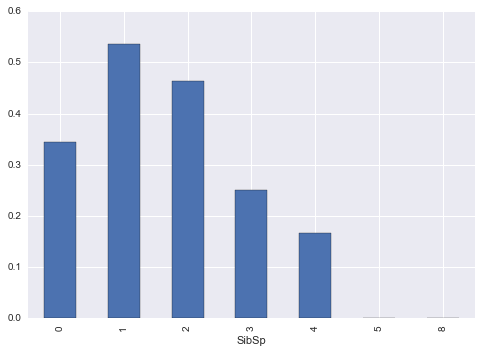

In [9]:
get_mean(x4) ### 1.3.4 mean survived rate in different sibsp

In [9]:
get_mean(x5) ### 1.3.5 mean survived rate in different Embark 

       PassengerId  Survived    Pclass        Age     SibSp       Fare
Parch                                                                 
3       579.200000  0.600000  2.600000  33.200000  1.000000  25.951660
1       465.110169  0.550847  2.203390  24.422000  1.084746  46.778180
2       416.662500  0.500000  2.275000  17.216912  2.062500  64.337604
0       445.255162  0.343658  2.321534  32.178503  0.237463  25.586774
5       435.200000  0.200000  3.000000  39.200000  0.600000  32.550000
4       384.000000  0.000000  2.500000  44.500000  0.750000  84.968750
6       679.000000  0.000000  3.000000  43.000000  1.000000  46.900000


NameError: global name 'titanic' is not defined

In [10]:
get_mean(x6) ### 1.3.6 mean survived rate in different parch

          PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Embarked                                                                   
C          445.357143  0.553571  1.886905  30.814769  0.386905  0.363095   
Q          417.896104  0.389610  2.909091  28.089286  0.428571  0.168831   
S          449.527950  0.336957  2.350932  29.445397  0.571429  0.413043   

               Fare  
Embarked             
C         59.954144  
Q         13.276030  
S         27.079812  


NameError: global name 'titanic' is not defined

### 1.4 results of data explore
* 1, Upper pclass means ligher survived rate
* 2, Female have higher survived rate
* 3, passenger with 1 or 2 Brother, Sister, Stepbrother, or Stepsister have higher survived rate
* 4, for survived rate: C > Q >S
* 5, people have 3 or 1 Parents/Children have higher survived rate than orthers
* 6, there some missing record in Age and Embarked item. Carbin record was lost more than half
* 7, whether age have some effect on survived rate in unknown

## 2 Data analysis
###   things I want to figure out 
* 1, whether age have remarkable influenen on survived rate.
* 2, whether Sex and Pclass have significant effect on survived.

### 2.1 age and survived rate
* step 1 clean missing data record in age
* step 2 change age date into more wide range as(0+,10+,20+,30+,40+,50+,60+,70+,80+
* step 3 analysis of variance


#### 2.1.1 clean data

In [12]:
allintatanic_aged=all_in_tatanic.dropna(subset=['Age'],inplace=False)       ## drop data without age recorrd

In [13]:
allintatanic_aged.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


#### 2.1.2 regroup data

In [14]:
allintatanic_aged['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
def age_group(i):            
    if i > 70 :
        return 'Ages 70 to 80'
    elif i > 60 :
        return 'Ages 70 to 80'
    elif i > 50:
        return 'Ages 70 to 80'
    elif i > 40:
        return 'Ages 70 to 80'
    elif i > 30:
        return 'Ages 70 to 80'
    elif i > 20:
        return 'Ages 70 to 80'
    elif i > 10:
        return 'Ages 70 to 80'
    else:
        return 'Ages 70 to 80'
titanic['Age Group'] = titanic.Age.apply(age_group)

In [16]:
allintatanic_aged['Age_grouped'] = cs(allintatanic_aged['Age'])

D:\Program Files\anado2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
allintatanic_aged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20+
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30+
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20+
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30+
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30+


             PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Age_grouped                                                                   
0+            430.843750  0.593750  2.640625   4.268281  1.843750  1.421875   
30+           468.690323  0.445161  2.090323  35.051613  0.374194  0.393548   
50+           449.809524  0.404762  1.523810  54.892857  0.309524  0.309524   
40+           483.500000  0.383721  1.918605  45.372093  0.372093  0.430233   
10+           447.660870  0.382609  2.530435  17.317391  0.591304  0.391304   
20+           428.682609  0.365217  2.386957  25.423913  0.321739  0.239130   
60+           430.882353  0.235294  1.529412  63.882353  0.176471  0.352941   
70+           438.200000  0.200000  1.800000  73.300000  0.000000  0.000000   

                  Fare  
Age_grouped             
0+           30.434439  
30+          42.496100  
50+          44.774802  
40+          41.163181  
10+          29.529531  
20+          28.306719  
60+      

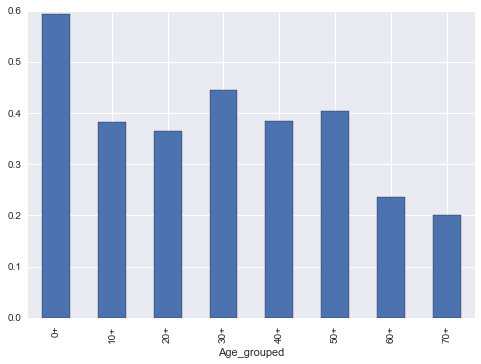

In [18]:
print allintatanic_aged.groupby('Age_grouped').mean().sort_values(by='Survived',ascending=False)
allintatanic_aged.groupby('Age_grouped')['Survived'].mean().plot(kind = 'bar')

### 2.1.3 statistical test between survived rate of these age groups

In [19]:
a1 = allintatanic_aged.groupby('Age_grouped')
print a1['Survived'].count()
print a1['Survived'].mean()

Age_grouped
0+      64
10+    115
20+    230
30+    155
40+     86
50+     42
60+     17
70+      5
Name: Survived, dtype: int64
Age_grouped
0+     0.593750
10+    0.382609
20+    0.365217
30+    0.445161
40+    0.383721
50+    0.404762
60+    0.235294
70+    0.200000
Name: Survived, dtype: float64


#### F-test to figure out  whether the survived rate of these age groups differ from each other.

In [20]:
def reset_index(df):              ### first I want to survived data in each age group
    return df.reset_index()
def ri (df):
    return df.apply(reset_index)
import scipy.stats as ss
a1s = ri(a1)['Survived']
a1s

Age_grouped    
0+           0     0
             1     1
             2     0
             3     0
             4     1
             5     0
             6     1
             7     0
             8     1
             9     0
             10    0
             11    0
             12    1
             13    0
             14    1
             15    0
             16    1
             17    1
             18    1
             19    0
             20    1
             21    1
             22    1
             23    0
             24    0
             25    1
             26    1
             27    1
             28    0
             29    1
                  ..
50+          34    0
             35    0
             36    1
             37    0
             38    1
             39    1
             40    1
             41    1
60+          0     0
             1     0
             2     0
             3     0
             4     1
             5     0
             6     0
             7    

### F test for the influence of different group on the survived rate
* none null hypothesis: all of population that these samples from have equal mean
* Significance level: 0.01


In [21]:
ss.f_oneway(a1s['0+'],a1s['10+'],a1s['20+'],                            ###  F -test 
            a1s['30+'],a1s['40+'],a1s['50+'],a1s['60+'],a1s['60+'])

F_onewayResult(statistic=2.3834465937863678, pvalue=0.02053631730141264)

#### as we get a pvalue > 0.01 ,we can not reject the null hypothesis.  These age groups have no significant difference between survived rate

### 2.2 pclass+sex  vs survived rate
#### As we have whole data about sex , Pclass and Survived,this time we do not dropno our data.
#### 2.2.1 explore data groupby Sex and Pclass


In [22]:
all_in_tatanic.groupby(['Pclass', 'Sex']).size()     ### group data with pclass and sex


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

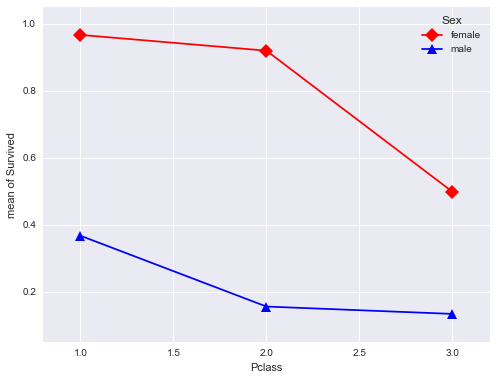

In [23]:

from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot
from statsmodels.stats.anova import anova_lm

at = all_in_tatanic
plt.figure(figsize=(8,6))           ### plot these data grouped by SEX and Pclass
fig = interaction_plot(at['Pclass'], at['Sex'], at['Survived'],colors=['red', 'blue'], markers=['D','^'], ms=10, ax=plt.gca())

#### from the plot above ,we can  know that female have much higher mean of survived than male and Pclass 1 passenger have higher mean of survived.
#### then ,we want to know whether Pclass,Sex,and  interaction between Pclass and Sex have significantly influence on survived rate.
#### 2.2.2 variance analysis

In [24]:
at_lm = ols('Survived ~ C(Pclass) * C(Sex)', data=at).fit()
table1= anova_lm(at_lm)                                 ### lsit variance analysis and F-test results
print (table1)

                     df      sum_sq    mean_sq           F        PR(>F)
C(Pclass)           2.0   24.333912  12.166956   84.261146  3.180879e-34
C(Sex)              1.0   53.165350  53.165350  368.191786  6.962809e-69
C(Pclass):C(Sex)    2.0    5.437720   2.718860   18.829215  9.812394e-09
Residual          885.0  127.790290   0.144396         NaN           NaN


#### variance analysis results show that Pclass,Sex,and interaction between Pclass and Sex all have signficantly influence on survived rate .

## 3. summary

* 1, Upper pclass means ligher survived rate
* 2, Female have higher survived rate
* 3, Plcass ,Sex and their interaction all have signficant influence on survived rate
* 4, Age have no signficant influence on survived rate

In [35]:
from statsmodels.graphics.mosaicplot import mosaic as mos